In [1]:
import pandas as pd
import protfasta
import numpy as np

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


First, reading in all variants on Lambert TFs.

In [2]:
from os import listdir
from os.path import isfile, join
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
TFs = [f for f in listdir("../soto_analysis/outputs/mutations/cds_bed_format/") if isfile(join("../soto_analysis/outputs/mutations/cds_bed_format/", f))]
TFs

['ENST00000359486',
 'ENST00000379044',
 'ENST00000437473',
 'ENST00000339562',
 'ENST00000348332',
 'ENST00000367265',
 'ENST00000342988',
 'ENST00000372583',
 'ENST00000262238',
 'ENST00000303329',
 'ENST00000315869',
 'ENST00000241001',
 'ENST00000348066',
 'ENST00000428368',
 'ENST00000318003',
 'ENST00000341099',
 'ENST00000056233',
 'ENST00000331340',
 'ENST00000356073',
 'ENST00000265340',
 'ENST00000377142',
 'ENST00000262518',
 'ENST00000239243',
 'ENST00000398919',
 'ENST00000373294',
 'ENST00000309446',
 'ENST00000561208',
 'ENST00000355995',
 'ENST00000395324',
 'ENST00000335670',
 'ENST00000312233',
 'ENST00000373036',
 'ENST00000434704',
 'ENST00000380013',
 'ENST00000355311',
 'ENST00000377022',
 'ENST00000250916',
 'ENST00000389506',
 'ENST00000246672',
 'ENST00000317216',
 'ENST00000403491',
 'ENST00000592199',
 'ENST00000358127',
 'ENST00000282549',
 'ENST00000264637']

In [3]:
all_tf_var_dfs = []

for TF in TFs:
    tf_vars = pd.read_csv("../soto_analysis/outputs/mutations/cds_expanded_iWES_v2_variants_snv_classified/" + TF + ".bed", sep = "\t", header = None)
    all_tf_var_dfs.append(tf_vars)

In [4]:
all_tf_vars = pd.concat(all_tf_var_dfs)
all_tf_vars = all_tf_vars.rename(columns = {0 :"#CHROM", 
                                           2: "POS",
                                           9: "REF",
                                           10: "ALT"})
all_tf_vars["POS"] = all_tf_vars["POS"].astype(int)
all_tf_vars["#CHROM"] = "chr" + all_tf_vars["#CHROM"].astype(str)
all_tf_vars = all_tf_vars[all_tf_vars[14] == "No-Syn"]
all_tf_vars

,#CHROM,1,POS,3,4,5,6,7,8,REF,ALT,11,12,13,14
0,chr22,42168659,42168660,ENSG00000100207,ENST00000359486,-,22,42168659,42168660,C,T,0.000061,R,Q,No-Syn
1,chr22,42168660,42168661,ENSG00000100207,ENST00000359486,-,22,42168660,42168661,G,A,0.000009,R,W,No-Syn
3,chr22,42168667,42168668,ENSG00000100207,ENST00000359486,-,22,42168667,42168668,C,A,0.000005,Q,H,No-Syn
4,chr22,42168678,42168679,ENSG00000100207,ENST00000359486,-,22,42168678,42168679,T,A,0.000192,S,C,No-Syn
5,chr22,42168686,42168687,ENSG00000100207,ENST00000359486,-,22,42168686,42168687,C,G,0.000019,G,A,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,chr17,40093338,40093339,ENSG00000126351,ENST00000264637,+,17,40093338,40093339,C,T,0.000023,P,L,No-Syn
251,chr17,40093349,40093350,ENSG00000126351,ENST00000264637,+,17,40093349,40093350,G,A,0.000028,E,K,No-Syn
252,chr17,40093355,40093356,ENSG00000126351,ENST00000264637,+,17,40093355,40093356,C,A,0.000009,L,M,No-Syn
253,chr17,40093356,40093357,ENSG00000126351,ENST00000264637,+,17,40093356,40093357,T,G,0.000005,L,R,No-Syn


In [5]:
all_tf_vars_coords = all_tf_vars[["#CHROM", "POS"]]
all_tf_vars_coords = all_tf_vars_coords.drop_duplicates()
all_tf_vars_coords = all_tf_vars_coords.sort_values(by = "#CHROM")
all_tf_vars_coords = all_tf_vars_coords.sort_values(by = "POS")
all_tf_vars_coords = all_tf_vars_coords.set_index(keys = ["#CHROM", "POS"])
all_tf_vars_coords

Empty DataFrame
Columns: []
Index: [(chr2, 1791880), (chr2, 1791881), (chr2, 1791884), (chr2, 1791915), (chr2, 1791928), (chr2, 1791930), (chr2, 1791937), (chr2, 1791950), (chr2, 1791957), (chr2, 1791961), (chr2, 1791974), (chr2, 1792001), (chr2, 1792005), (chr2, 1792325), (chr2, 1792328), (chr2, 1792333), (chr2, 1792367), (chr2, 1792377), (chr2, 1792383), (chr2, 1792421), (chr2, 1792423), (chr2, 1801716), (chr2, 1801734), (chr2, 1801736), (chr2, 1801746), (chr2, 1801772), (chr2, 1801788), (chr2, 1809076), (chr2, 1839177), (chr2, 1839192), (chr2, 1839240), (chr2, 1839257), (chr2, 1839264), (chr2, 1839279), (chr2, 1839285), (chr2, 1839293), (chr2, 1839309), (chr2, 1839321), (chr2, 1839330), (chr2, 1839351), (chr2, 1840785), (chr2, 1840793), (chr2, 1840800), (chr2, 1840817), (chr2, 1851695), (chr19, 1854470), (chr19, 1854472), (chr19, 1854473), (chr19, 1854484), (chr19, 1854485), (chr19, 1854487), (chr19, 1854504), (chr19, 1854524), (chr19, 1854544), (chr19, 1854547), (chr19, 1854548), (chr19, 1854550), (chr19, 1854551), (chr19, 1854554), (chr19, 1854557), (chr19, 1854562), (chr19, 1854565), (chr19, 1854573), (chr19, 1854575), (chr19, 1854577), (chr19, 1854580), (chr19, 1854586), (chr19, 1854587), (chr19, 1854590), (chr19, 1854596), (chr19, 1854598), (chr19, 1854611), (chr19, 1854634), (chr19, 1854635), (chr19, 1854656), (chr19, 1854673), (chr19, 1854686), (chr19, 1854691), (chr19, 1854726), (chr19, 1854730), (chr19, 1854733), (chr19, 1854755), (chr19, 1863053), (chr19, 1863076), (chr19, 1863089), (chr19, 1863100), (chr19, 1863103), (chr19, 1863109), (chr19, 1863116), (chr19, 1863130), (chr19, 1863140), (chr19, 1863145), (chr19, 1863146), (chr19, 1863148), (chr19, 1863149), (chr19, 1863154), (chr19, 1863169), (chr19, 1863170), (chr19, 1863175), (chr19, 1863188), ...]

[11715 rows x 0 columns]

In [6]:
chunksize = 100000 
am_output = pd.DataFrame()
num_vars = 0
alpha_m = "../data/AlphaMissense_hg38.tsv"

# Reading in chunks, keeping rows overlapping a variant
for chunk in pd.read_csv(alpha_m, sep='\t', chunksize=chunksize, header = 3):
    chunk = chunk.set_index(keys = ["#CHROM", "POS"])
    joined = pd.merge(all_tf_vars_coords, chunk, left_index=True, right_index=True)
    am_output = pd.concat([am_output, joined])
    if len(joined):
        print(len(set(am_output.index)))
        # display(joined)

686
888
1809
2089
2181
2692
2877
3007
3089
3437
4035
4192
4391
4474
4604
4735
4938
6147
6555
6698
6864
6952
7159
7271
7723
7760
8030
8391
8489
8589
8740
8809
8914
9032
9707
10367
10432
10550
10663
10977
11134
11229
11319
11451
11571
11693


In [43]:
am_output = am_output.reset_index()
am_output

,#CHROM,POS,REF,ALT,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class,ENST
0,chr1,10638950,A,C,hg38,Q86V15,ENST00000377022.8,S1758A,0.0695,likely_benign,ENST00000377022
1,chr1,10638950,A,G,hg38,Q86V15,ENST00000377022.8,S1758P,0.0826,likely_benign,ENST00000377022
2,chr1,10638950,A,T,hg38,Q86V15,ENST00000377022.8,S1758T,0.0899,likely_benign,ENST00000377022
3,chr1,10638962,T,C,hg38,Q86V15,ENST00000377022.8,T1754A,0.0437,likely_benign,ENST00000377022
4,chr1,10638962,T,G,hg38,Q86V15,ENST00000377022.8,T1754P,0.0528,likely_benign,ENST00000377022
...,...,...,...,...,...,...,...,...,...,...,...
32860,chrX,80031092,C,G,hg38,Q9Y458,ENST00000373294.8,A515G,0.0968,likely_benign,ENST00000373294
32861,chrX,80031092,C,T,hg38,Q9Y458,ENST00000373294.8,A515V,0.0918,likely_benign,ENST00000373294
32862,chrX,80031101,A,G,hg38,Q9Y458,ENST00000373294.8,H518R,0.0748,likely_benign,ENST00000373294
32863,chrX,80031101,A,T,hg38,Q9Y458,ENST00000373294.8,H518L,0.1275,likely_benign,ENST00000373294


In [45]:
# Now, only keeping if matches an ENST
am_output[["uniprot_id", "transcript_id"]].value_counts()
# Looks like only one ENST per uniprotID as expected, canonical uniprotID 

uniprot_id  transcript_id     
Q6ZRS2      ENST00000262518.9     3428
Q03164      ENST00000389506.10    2655
Q5T1R4      ENST00000372583.6     2565
Q86V15      ENST00000377022.8     1920
Q9UGU0      ENST00000359486.7     1883
Q6N021      ENST00000380013.8     1834
Q9UGL1      ENST00000367265.8     1406
Q15788      ENST00000348332.7     1303
O94983      ENST00000348066.8     1143
Q6P1N0      ENST00000318003.11    1126
Q9Y4A8      ENST00000056233.4      859
Q8NBF1      ENST00000312233.4      788
Q9UL68      ENST00000428368.7      744
P20393      ENST00000246672.4      591
Q9HBZ2      ENST00000303329.9      573
Q14872      ENST00000373036.5      565
Q92731      ENST00000341099.5      551
Q9NQB0      ENST00000355995.8      522
Q13422      ENST00000331340.8      443
P11473      ENST00000395324.6      440
P43354      ENST00000409572.5      433
Q96QS3      ENST00000379044.5      373
Q9H4W6      ENST00000355311.9      372
P15884      ENST00000564999.5      372
O14770      ENST00000561208.6    

In [46]:
all_tf_vars

,#CHROM,1,POS,3,4,5,6,7,8,REF,ALT,11,12,13,14
0,chr22,42168659,42168660,ENSG00000100207,ENST00000359486,-,22,42168659,42168660,C,T,0.000061,R,Q,No-Syn
1,chr22,42168660,42168661,ENSG00000100207,ENST00000359486,-,22,42168660,42168661,G,A,0.000009,R,W,No-Syn
3,chr22,42168667,42168668,ENSG00000100207,ENST00000359486,-,22,42168667,42168668,C,A,0.000005,Q,H,No-Syn
4,chr22,42168678,42168679,ENSG00000100207,ENST00000359486,-,22,42168678,42168679,T,A,0.000192,S,C,No-Syn
5,chr22,42168686,42168687,ENSG00000100207,ENST00000359486,-,22,42168686,42168687,C,G,0.000019,G,A,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,chr17,40093338,40093339,ENSG00000126351,ENST00000264637,+,17,40093338,40093339,C,T,0.000023,P,L,No-Syn
251,chr17,40093349,40093350,ENSG00000126351,ENST00000264637,+,17,40093349,40093350,G,A,0.000028,E,K,No-Syn
252,chr17,40093355,40093356,ENSG00000126351,ENST00000264637,+,17,40093355,40093356,C,A,0.000009,L,M,No-Syn
253,chr17,40093356,40093357,ENSG00000126351,ENST00000264637,+,17,40093356,40093357,T,G,0.000005,L,R,No-Syn


In [47]:
am_output["POS"] = am_output["POS"].astype(int)
all_tf_vars["POS"] = all_tf_vars["POS"].astype(int)

In [48]:
merged_tf = pd.merge(all_tf_vars, am_output, on = ["#CHROM","POS","REF","ALT"])
merged_tf

,#CHROM,1,POS,3,4,5,6,7,8,REF,...,12,13,14,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class,ENST
0,chr22,42168659,42168660,ENSG00000100207,ENST00000359486,-,22,42168659,42168660,C,...,R,Q,No-Syn,hg38,Q9UGU0,ENST00000359486.7,R1959Q,0.4418,ambiguous,ENST00000359486
1,chr22,42168660,42168661,ENSG00000100207,ENST00000359486,-,22,42168660,42168661,G,...,R,W,No-Syn,hg38,Q9UGU0,ENST00000359486.7,R1959W,0.7450,likely_pathogenic,ENST00000359486
2,chr22,42168667,42168668,ENSG00000100207,ENST00000359486,-,22,42168667,42168668,C,...,Q,H,No-Syn,hg38,Q9UGU0,ENST00000359486.7,Q1956H,0.7462,likely_pathogenic,ENST00000359486
3,chr22,42168678,42168679,ENSG00000100207,ENST00000359486,-,22,42168678,42168679,T,...,S,C,No-Syn,hg38,Q9UGU0,ENST00000359486.7,S1953C,0.3807,ambiguous,ENST00000359486
4,chr22,42168686,42168687,ENSG00000100207,ENST00000359486,-,22,42168686,42168687,C,...,G,A,No-Syn,hg38,Q9UGU0,ENST00000359486.7,G1950A,0.3163,likely_benign,ENST00000359486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12489,chr17,40093338,40093339,ENSG00000126351,ENST00000264637,+,17,40093338,40093339,C,...,P,L,No-Syn,hg38,P10827,ENST00000264637.8,P477L,0.0847,likely_benign,ENST00000264637
12490,chr17,40093349,40093350,ENSG00000126351,ENST00000264637,+,17,40093349,40093350,G,...,E,K,No-Syn,hg38,P10827,ENST00000264637.8,E481K,0.0857,likely_benign,ENST00000264637
12491,chr17,40093355,40093356,ENSG00000126351,ENST00000264637,+,17,40093355,40093356,C,...,L,M,No-Syn,hg38,P10827,ENST00000264637.8,L483M,0.0825,likely_benign,ENST00000264637
12492,chr17,40093356,40093357,ENSG00000126351,ENST00000264637,+,17,40093356,40093357,T,...,L,R,No-Syn,hg38,P10827,ENST00000264637.8,L483R,0.0698,likely_benign,ENST00000264637


In [49]:
# AD variants only
all_ad_var_dfs = []

for TF in TFs:
    ad_vars = pd.read_csv("../soto_analysis/outputs/mutations/domains_expanded_iWES_v2_variants_snv_classified/" + TF + ".bed", sep = "\t", header = None)
    all_ad_var_dfs.append(ad_vars)

In [50]:
all_ad_vars = pd.concat(all_ad_var_dfs)
all_ad_vars = all_ad_vars[all_ad_vars[22] == "No-Syn"]
all_ad_vars = all_ad_vars.rename(columns = {0 :"#CHROM", 
                                           2: "POS",
                                           17: "REF",
                                           18: "ALT"})
all_ad_vars["#CHROM"] = "chr" + all_ad_vars["#CHROM"].astype(str)
all_ad_vars["POS"] = all_ad_vars["POS"].astype(int)
all_ad_vars = all_ad_vars[all_ad_vars[3] == "AD"]
all_ad_vars

,#CHROM,1,POS,3,4,5,6,7,8,9,...,13,14,15,16,REF,ALT,19,20,21,22
4,chr22,42214325,42214326,AD,ENSG00000100207,.,-,ENST00000359486,22,42214325,...,-,22,42214325,42214326,T,C,0.000014,H,R,No-Syn
5,chr22,42214327,42214328,AD,ENSG00000100207,.,-,ENST00000359486,22,42214327,...,-,22,42214327,42214328,C,G,0.000014,Q,H,No-Syn
6,chr22,42214329,42214330,AD,ENSG00000100207,.,-,ENST00000359486,22,42214329,...,-,22,42214329,42214330,G,C,0.000009,Q,E,No-Syn
7,chr22,42214335,42214336,AD,ENSG00000100207,.,-,ENST00000359486,22,42214335,...,-,22,42214335,42214336,G,A,0.000009,P,S,No-Syn
10,chr22,42214352,42214353,AD,ENSG00000100207,.,-,ENST00000359486,22,42214352,...,-,22,42214352,42214353,G,A,0.000037,P,L,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,chr17,40076878,40076879,AD,ENSG00000126351,.,+,ENST00000264637,17,40076878,...,+,17,40076878,40076879,C,T,0.000028,S,L,No-Syn
56,chr17,40076893,40076894,AD,ENSG00000126351,.,+,ENST00000264637,17,40076893,...,+,17,40076893,40076894,G,A,0.000019,R,Q,No-Syn
58,chr17,40076899,40076900,AD,ENSG00000126351,.,+,ENST00000264637,17,40076899,...,+,17,40076899,40076900,G,A,0.000023,R,K,No-Syn
59,chr17,40076910,40076911,AD,ENSG00000126351,.,+,ENST00000264637,17,40076910,...,+,17,40076910,40076911,C,G,0.000014,Q,E,No-Syn


In [51]:
all_dbd_vars = pd.concat(all_ad_var_dfs)
all_dbd_vars = all_dbd_vars[all_dbd_vars[22] == "No-Syn"]
all_dbd_vars = all_dbd_vars.rename(columns = {0 :"#CHROM", 
                                           2: "POS",
                                           17: "REF",
                                           18: "ALT"})
all_dbd_vars["#CHROM"] = "chr" + all_dbd_vars["#CHROM"].astype(str)
all_dbd_vars["POS"] = all_dbd_vars["POS"].astype(int)
all_dbd_vars = all_dbd_vars[all_dbd_vars[3] == "DBD"]
all_dbd_vars

,#CHROM,1,POS,3,4,5,6,7,8,9,...,13,14,15,16,REF,ALT,19,20,21,22
2,chr22,42210666,42210667,DBD,ENSG00000100207,.,-,ENST00000359486,22,42210666,...,-,22,42210666,42210667,C,T,0.000014,V,M,No-Syn
3,chr22,42210673,42210674,DBD,ENSG00000100207,.,-,ENST00000359486,22,42210673,...,-,22,42210673,42210674,A,C,0.000005,I,M,No-Syn
0,chrX,25007408,25007409,DBD,ENSG00000004848,.,-,ENST00000379044,X,25007408,...,-,X,25007408,25007409,G,A,0.000005,R,C,No-Syn
3,chrX,25010266,25010267,DBD,ENSG00000004848,.,-,ENST00000379044,X,25010266,...,-,X,25010266,25010267,C,T,0.000033,R,Q,No-Syn
14,chrX,25013007,25013008,DBD,ENSG00000004848,.,-,ENST00000379044,X,25013007,...,-,X,25013007,25013008,C,G,0.000061,R,S,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,chr17,40083921,40083922,DBD,ENSG00000126351,.,+,ENST00000264637,17,40083921,...,+,17,40083921,40083922,C,T,0.000019,R,C,No-Syn
37,chr17,40083958,40083959,DBD,ENSG00000126351,.,+,ENST00000264637,17,40083958,...,+,17,40083958,40083959,T,C,0.000009,I,T,No-Syn
39,chr17,40083960,40083961,DBD,ENSG00000126351,.,+,ENST00000264637,17,40083960,...,+,17,40083960,40083961,G,T,0.000225,A,S,No-Syn
40,chr17,40083960,40083961,DBD,ENSG00000126351,.,+,ENST00000264637,17,40083960,...,+,17,40083960,40083961,G,A,0.000056,A,T,No-Syn


In [52]:
merged_ad = pd.merge(all_ad_vars, am_output, on = ["#CHROM","POS","REF","ALT"])
merged_ad

,#CHROM,1,POS,3,4,5,6,7,8,9,...,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class,ENST
0,chr22,42214325,42214326,AD,ENSG00000100207,.,-,ENST00000359486,22,42214325,...,H,R,No-Syn,hg38,Q9UGU0,ENST00000359486.7,H327R,0.2956,likely_benign,ENST00000359486
1,chr22,42214327,42214328,AD,ENSG00000100207,.,-,ENST00000359486,22,42214327,...,Q,H,No-Syn,hg38,Q9UGU0,ENST00000359486.7,Q326H,0.2083,likely_benign,ENST00000359486
2,chr22,42214329,42214330,AD,ENSG00000100207,.,-,ENST00000359486,22,42214329,...,Q,E,No-Syn,hg38,Q9UGU0,ENST00000359486.7,Q326E,0.1679,likely_benign,ENST00000359486
3,chr22,42214335,42214336,AD,ENSG00000100207,.,-,ENST00000359486,22,42214335,...,P,S,No-Syn,hg38,Q9UGU0,ENST00000359486.7,P324S,0.0586,likely_benign,ENST00000359486
4,chr22,42214352,42214353,AD,ENSG00000100207,.,-,ENST00000359486,22,42214352,...,P,L,No-Syn,hg38,Q9UGU0,ENST00000359486.7,P318L,0.1107,likely_benign,ENST00000359486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,chr17,40076878,40076879,AD,ENSG00000126351,.,+,ENST00000264637,17,40076878,...,S,L,No-Syn,hg38,P10827,ENST00000264637.8,S21L,0.0703,likely_benign,ENST00000264637
3176,chr17,40076893,40076894,AD,ENSG00000126351,.,+,ENST00000264637,17,40076893,...,R,Q,No-Syn,hg38,P10827,ENST00000264637.8,R26Q,0.2129,likely_benign,ENST00000264637
3177,chr17,40076899,40076900,AD,ENSG00000126351,.,+,ENST00000264637,17,40076899,...,R,K,No-Syn,hg38,P10827,ENST00000264637.8,R28K,0.1445,likely_benign,ENST00000264637
3178,chr17,40076910,40076911,AD,ENSG00000126351,.,+,ENST00000264637,17,40076910,...,Q,E,No-Syn,hg38,P10827,ENST00000264637.8,Q32E,0.1266,likely_benign,ENST00000264637


In [53]:
merged_ad.to_csv("../output/alphamissense_path_preds_AD_vars.csv")

In [54]:
merged_dbd = pd.merge(all_dbd_vars, am_output, on = ["#CHROM","POS","REF","ALT"])
merged_dbd

,#CHROM,1,POS,3,4,5,6,7,8,9,...,20,21,22,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class,ENST
0,chr22,42210666,42210667,DBD,ENSG00000100207,.,-,ENST00000359486,22,42210666,...,V,M,No-Syn,hg38,Q9UGU0,ENST00000359486.7,V1547M,0.9382,likely_pathogenic,ENST00000359486
1,chr22,42210673,42210674,DBD,ENSG00000100207,.,-,ENST00000359486,22,42210673,...,I,M,No-Syn,hg38,Q9UGU0,ENST00000359486.7,I1544M,0.6626,likely_pathogenic,ENST00000359486
2,chrX,25007408,25007409,DBD,ENSG00000004848,.,-,ENST00000379044,X,25007408,...,R,C,No-Syn,hg38,Q96QS3,ENST00000379044.5,R384C,0.9997,likely_pathogenic,ENST00000379044
3,chrX,25010266,25010267,DBD,ENSG00000004848,.,-,ENST00000379044,X,25010266,...,R,Q,No-Syn,hg38,Q96QS3,ENST00000379044.5,R371Q,0.9980,likely_pathogenic,ENST00000379044
4,chrX,25013007,25013008,DBD,ENSG00000004848,.,-,ENST00000379044,X,25013007,...,R,S,No-Syn,hg38,Q96QS3,ENST00000379044.5,R329S,0.9999,likely_pathogenic,ENST00000379044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,chr17,40083921,40083922,DBD,ENSG00000126351,.,+,ENST00000264637,17,40083921,...,R,C,No-Syn,hg38,P10827,ENST00000264637.8,R104C,0.9999,likely_pathogenic,ENST00000264637
352,chr17,40083958,40083959,DBD,ENSG00000126351,.,+,ENST00000264637,17,40083958,...,I,T,No-Syn,hg38,P10827,ENST00000264637.8,I116T,0.2890,likely_benign,ENST00000264637
353,chr17,40083960,40083961,DBD,ENSG00000126351,.,+,ENST00000264637,17,40083960,...,A,S,No-Syn,hg38,P10827,ENST00000264637.8,A117S,0.0746,likely_benign,ENST00000264637
354,chr17,40083960,40083961,DBD,ENSG00000126351,.,+,ENST00000264637,17,40083960,...,A,T,No-Syn,hg38,P10827,ENST00000264637.8,A117T,0.1131,likely_benign,ENST00000264637


In [55]:
merged_tf_minus_ad = pd.merge(merged_tf, merged_ad[['#CHROM','POS', 'REF', 'ALT']], 
                                                    on=['#CHROM','POS', 'REF', 'ALT'], how="outer", indicator=True)
merged_tf_minus_ad = merged_tf_minus_ad[merged_tf_minus_ad['_merge'] == 'left_only']
merged_tf_minus_ad = merged_tf_minus_ad.drop(columns = "_merge")
merged_tf_minus_ad

,#CHROM,1,POS,3,4,5,6,7,8,REF,...,12,13,14,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class,ENST
0,chr1,10638949,10638950,ENSG00000130940,ENST00000377022,-,1,10638949,10638950,A,...,S,T,No-Syn,hg38,Q86V15,ENST00000377022.8,S1758T,0.0899,likely_benign,ENST00000377022
1,chr1,10638961,10638962,ENSG00000130940,ENST00000377022,-,1,10638961,10638962,T,...,T,A,No-Syn,hg38,Q86V15,ENST00000377022.8,T1754A,0.0437,likely_benign,ENST00000377022
2,chr1,10638963,10638964,ENSG00000130940,ENST00000377022,-,1,10638963,10638964,G,...,P,L,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753L,0.2777,likely_benign,ENST00000377022
3,chr1,10638963,10638964,ENSG00000130940,ENST00000377022,-,1,10638963,10638964,G,...,P,R,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753R,0.1449,likely_benign,ENST00000377022
4,chr1,10638964,10638965,ENSG00000130940,ENST00000377022,-,1,10638964,10638965,G,...,P,S,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753S,0.0978,likely_benign,ENST00000377022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12489,chrX,80031061,80031062,ENSG00000122145,ENST00000373294,+,X,80031061,80031062,G,...,G,V,No-Syn,hg38,Q9Y458,ENST00000373294.8,G505V,0.0942,likely_benign,ENST00000373294
12490,chrX,80031066,80031067,ENSG00000122145,ENST00000373294,+,X,80031066,80031067,T,...,C,R,No-Syn,hg38,Q9Y458,ENST00000373294.8,C507R,0.0901,likely_benign,ENST00000373294
12491,chrX,80031083,80031084,ENSG00000122145,ENST00000373294,+,X,80031083,80031084,G,...,W,C,No-Syn,hg38,Q9Y458,ENST00000373294.8,W512C,0.2740,likely_benign,ENST00000373294
12492,chrX,80031091,80031092,ENSG00000122145,ENST00000373294,+,X,80031091,80031092,C,...,A,E,No-Syn,hg38,Q9Y458,ENST00000373294.8,A515E,0.1105,likely_benign,ENST00000373294


In [56]:
merged_tf_minus_ad_and_dbd = pd.merge(merged_tf_minus_ad, merged_dbd[['#CHROM','POS', 'REF', 'ALT']], 
                                                    on=['#CHROM','POS', 'REF', 'ALT'], how="outer", indicator=True)
merged_tf_minus_ad_and_dbd = merged_tf_minus_ad_and_dbd[merged_tf_minus_ad_and_dbd['_merge'] == 'left_only']
merged_tf_minus_ad_and_dbd

,#CHROM,1,POS,3,4,5,6,7,8,REF,...,13,14,genome,uniprot_id,transcript_id,protein_variant,am_pathogenicity,am_class,ENST,_merge
0,chr1,10638949.0,10638950,ENSG00000130940,ENST00000377022,-,1,10638949.0,10638950.0,A,...,T,No-Syn,hg38,Q86V15,ENST00000377022.8,S1758T,0.0899,likely_benign,ENST00000377022,left_only
1,chr1,10638961.0,10638962,ENSG00000130940,ENST00000377022,-,1,10638961.0,10638962.0,T,...,A,No-Syn,hg38,Q86V15,ENST00000377022.8,T1754A,0.0437,likely_benign,ENST00000377022,left_only
2,chr1,10638963.0,10638964,ENSG00000130940,ENST00000377022,-,1,10638963.0,10638964.0,G,...,L,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753L,0.2777,likely_benign,ENST00000377022,left_only
3,chr1,10638963.0,10638964,ENSG00000130940,ENST00000377022,-,1,10638963.0,10638964.0,G,...,R,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753R,0.1449,likely_benign,ENST00000377022,left_only
4,chr1,10638964.0,10638965,ENSG00000130940,ENST00000377022,-,1,10638964.0,10638965.0,G,...,S,No-Syn,hg38,Q86V15,ENST00000377022.8,P1753S,0.0978,likely_benign,ENST00000377022,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,chrX,80031061.0,80031062,ENSG00000122145,ENST00000373294,+,X,80031061.0,80031062.0,G,...,V,No-Syn,hg38,Q9Y458,ENST00000373294.8,G505V,0.0942,likely_benign,ENST00000373294,left_only
9326,chrX,80031066.0,80031067,ENSG00000122145,ENST00000373294,+,X,80031066.0,80031067.0,T,...,R,No-Syn,hg38,Q9Y458,ENST00000373294.8,C507R,0.0901,likely_benign,ENST00000373294,left_only
9327,chrX,80031083.0,80031084,ENSG00000122145,ENST00000373294,+,X,80031083.0,80031084.0,G,...,C,No-Syn,hg38,Q9Y458,ENST00000373294.8,W512C,0.2740,likely_benign,ENST00000373294,left_only
9328,chrX,80031091.0,80031092,ENSG00000122145,ENST00000373294,+,X,80031091.0,80031092.0,C,...,E,No-Syn,hg38,Q9Y458,ENST00000373294.8,A515E,0.1105,likely_benign,ENST00000373294,left_only


In [57]:
np.mean(merged_ad["am_pathogenicity"])

np.float64(0.25701415094339625)

In [58]:
np.mean(merged_tf_minus_ad["am_pathogenicity"])

np.float64(0.30533385226540694)

<Axes: xlabel='am_class', ylabel='Density'>

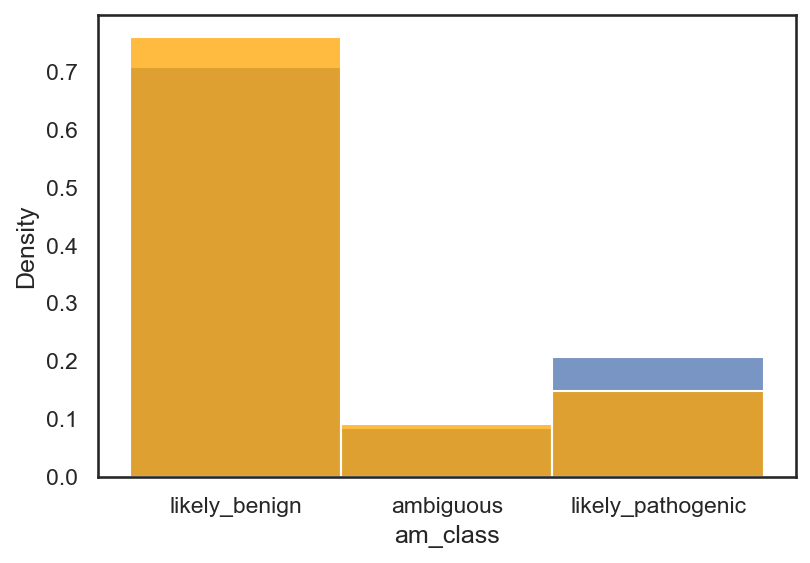

In [59]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(6,4), 'figure.dpi':150})
sns.set_style("white")
import matplotlib.pyplot as plt


sns.histplot(merged_tf_minus_ad["am_class"], stat = "density")
sns.histplot(merged_ad["am_class"], stat = "density", color = "orange")

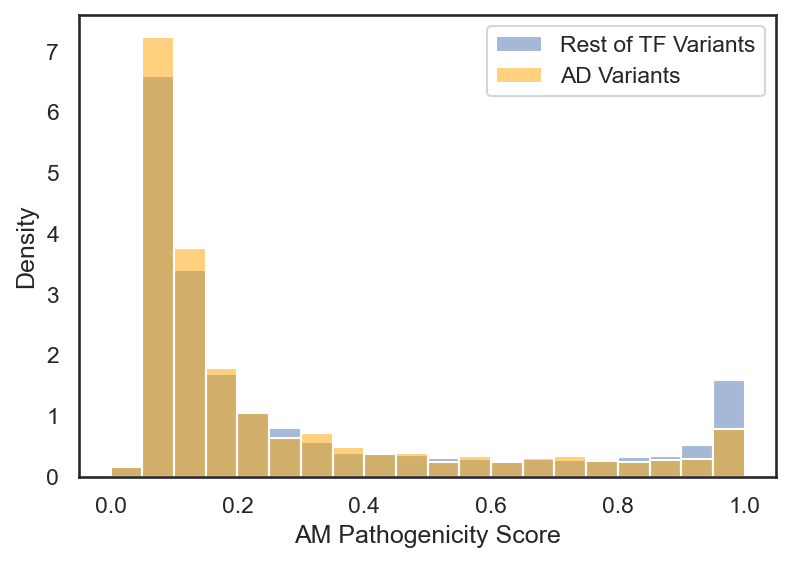

In [60]:
bins = np.arange(0, 1.05, 0.05)
sns.histplot(merged_tf_minus_ad["am_pathogenicity"], stat = "density", label = "Rest of TF Variants", color = "b", bins = bins, alpha = 0.5)
sns.histplot(merged_ad["am_pathogenicity"], stat = "density", label = "AD Variants", color = "orange", bins = bins, alpha = 0.5)
plt.xlabel("AM Pathogenicity Score")
plt.legend();

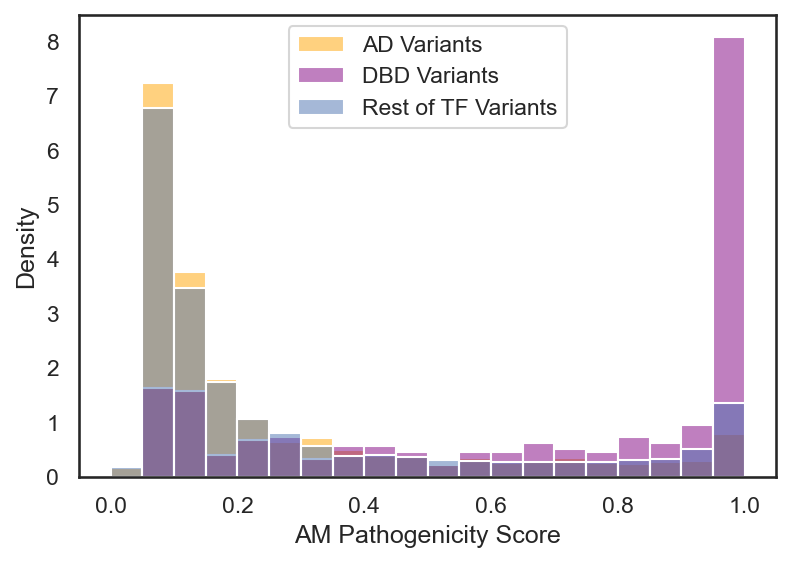

In [61]:
bins = np.arange(0, 1.05, 0.05)
sns.histplot(merged_ad["am_pathogenicity"], stat = "density", label = "AD Variants", color = "orange",bins = bins, alpha = 0.5)
sns.histplot(merged_dbd["am_pathogenicity"], stat = "density", label = "DBD Variants", color = "purple", bins = bins, alpha = 0.5)
sns.histplot(merged_tf_minus_ad_and_dbd["am_pathogenicity"], stat = "density", label = "Rest of TF Variants", color = "b", bins = bins, alpha = 0.5)

plt.xlabel("AM Pathogenicity Score")
plt.legend();

Sampling

In [62]:
len(merged_ad)

3180

In [63]:
sample_expec_pathog_avgs = []
for i in range(10000):
    sampled_ad_vars = merged_tf.sample(n = len(merged_ad), replace=True)
    expec_pathog_avg = np.mean(sampled_ad_vars["am_pathogenicity"])
    sample_expec_pathog_avgs.append(expec_pathog_avg)

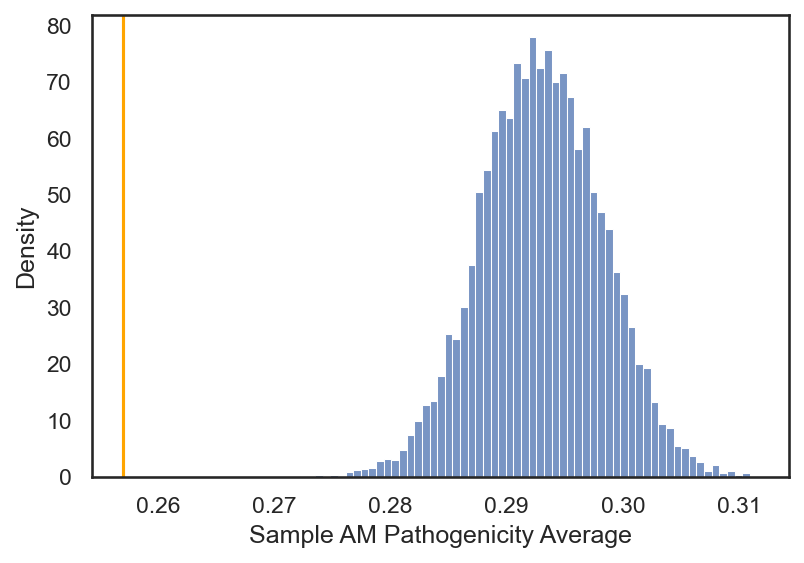

In [64]:
sns.histplot(sample_expec_pathog_avgs, stat = "density")
plt.axvline(np.mean(merged_ad["am_pathogenicity"]), 0,1, color = "orange")
plt.xlabel("Sample AM Pathogenicity Average");

In [65]:
len(merged_ad)

3180

In [66]:
# DBD
len(merged_dbd)

356

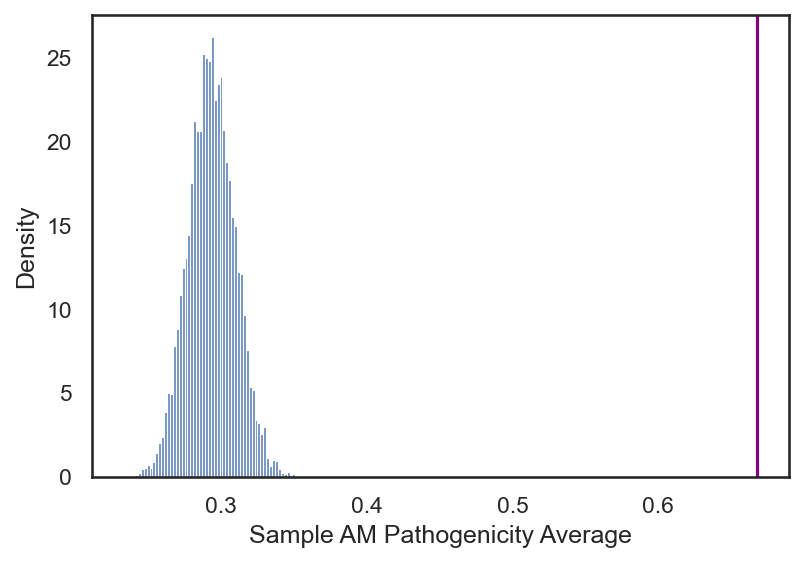

In [67]:
sample_expec_pathog_avgs_dbd = []
for i in range(10000):
    sampled_dbd_vars = merged_tf.sample(n = len(merged_dbd), replace=True)
    expec_pathog_avg_dbd = np.mean(sampled_dbd_vars["am_pathogenicity"])
    sample_expec_pathog_avgs_dbd.append(expec_pathog_avg_dbd)

sns.histplot(sample_expec_pathog_avgs_dbd, stat = "density")
plt.axvline(np.mean(merged_dbd["am_pathogenicity"]), 0,1, color = "purple")
plt.xlabel("Sample AM Pathogenicity Average");